# Read csv files and plot learning curves for FedAvg experiment 2

In [1]:
import torch
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import os
from os import walk
from os.path import join
os.getcwd()

'C:\\Users\\wangyuan\\myfl-1\\Federated-Learning-PyTorch'

In [16]:
file_path_1 = 'save\\figures-mnist\\data_src_exp_1_iid'
_, _, filenames_1 = next(walk(file_path_1))
files_to_read_1 = [join(file_path_1,f) for f in filenames_1]
df_1 = [pd.read_csv(f) for f in files_to_read_1]

file_path_2 = 'save\\figures-mnist\\data_src_exp_1_non_iid'
_, _, filenames_2 = next(walk(file_path_2))
files_to_read_2 = [join(file_path_2,f) for f in filenames_2]
df_2 = [pd.read_csv(f) for f in files_to_read_2]

In [17]:
# manually set the label names
run_labels=[0]*8
run_labels[0] = '$E=5$, $B=10$, $C=0.0$'
run_labels[1] = '$E=5$, $B=10$, $C=0.1$'
run_labels[2] = '$E=5$, $B=10$, $C=0.2$'
run_labels[3] = '$E=5$, $B=10$, $C=0.5$'
run_labels[4] = '$E=5$, $B=\infty$, $C=0.0$'
run_labels[5] = '$E=5$, $B=\infty$, $C=0.1$'
run_labels[6] = '$E=5$, $B=\infty$, $C=0.2$'
run_labels[7] = '$E=5$, $B=\infty$, $C=0.5$'

# define linestyle and color
run_colors, run_linestyles = [0]*8, [0]*8

for i in range(4):
    run_linestyles[i] = '-'
for i in range(4,8):
    run_linestyles[i] = '--'

run_colors[0], run_colors[4] = 'dodgerblue', 'dodgerblue'
run_colors[1], run_colors[5] = 'deeppink', 'deeppink'
run_colors[2], run_colors[6] = 'orange', 'orange'
run_colors[3], run_colors[7] = 'springgreen', 'springgreen'

### choosing color and linestyle
Please see https://matplotlib.org/stable/gallery/color/named_colors.html and https://matplotlib.org/3.0.3/gallery/lines_bars_and_markers/line_styles_reference.html

Text(27.0, 0.5, 'Test acc')

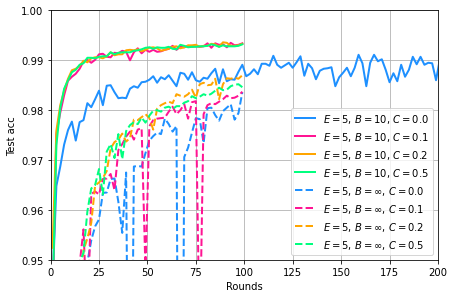

In [26]:
# plot the first figure for experiment 1 with iid data 
step_1=2
plt.figure()
for i, data in enumerate(df_1):
    x = [dx for j, dx in enumerate(data['Step'].tolist()) if j % step_1 == 0]
    y = [dy for j, dy in enumerate(data['Value'].tolist()) if j % step_1 == 0]   
    plt.plot(x,y,label=run_labels[i], linestyle=run_linestyles[i], color=run_colors[i],linewidth=2)
#     plt.plot(x,y,label=run_labels[i],linewidth=2)
    plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.xlim(0,200)
plt.ylim(0.95,1.0)
plt.xlabel('Rounds')
plt.ylabel('Test acc')
# plt.savefig('save\\figures-mnist\\fedavg-exp-2-iid.png')

Text(27.0, 0.5, 'Test acc')

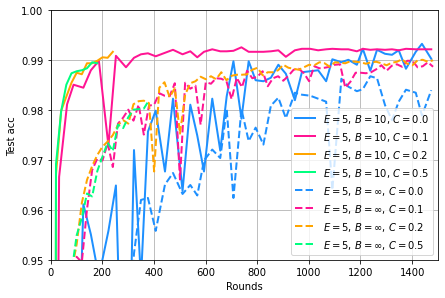

In [28]:
# plot the first figure for experiment 1 with non-iid data 
step_2=20
plt.figure()
for i, data in enumerate(df_2):
    x = [dx for j, dx in enumerate(data['Step'].tolist()) if j % step_2 == 0]
    y = [dy for j, dy in enumerate(data['Value'].tolist()) if j % step_2 == 0]   
    plt.plot(x,y,label=run_labels[i], linestyle=run_linestyles[i], color=run_colors[i],linewidth=2)
#     plt.plot(x,y,label=run_labels[i],linewidth=2)
    plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.xlim(0,1500)
plt.ylim(0.95,1.0)
plt.xlabel('Rounds')
plt.ylabel('Test acc')
# plt.savefig('save\\figures-mnist\\fedavg-exp-2-non-iid.png')